# Определение числа наблюдений

In [55]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# TODO: Определить необходимое число наблюдений 
#       в эксперименте для получения значимого результата:
# Текущий уровень конверсии: 1%
# Минимальный уровень изменений: +0.1%
# Уровень значимости: 95%
# Требуемая мощность критерия: 90%

In [2]:
p = 0.01
DIFF = 0.001
Q = 0.95
P = 0.9

In [3]:
# вычисление параметров нормального распределения до / после

# конверсия (вероятность) до / после изменений
p = p
p_ = p + DIFF

# z-коэффициент до / после (масштабный множитель при std)
# здесь использовалась односторонний уровень значимость
z_ = st.norm.ppf(P)
z = st.norm.ppf(Q)

# величина выборки
N = ((z * (p * (1 - p)) ** (1 / 2) + z_ * (p_ * (1 - p_)) ** (1 / 2)) / (p_ - p)) ** 2

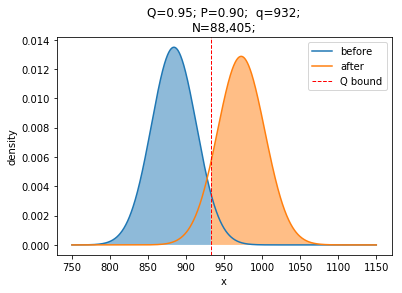

In [59]:
# определение параметров распределений с учетом найденного N до / после
mn = N * p
mn_ = N * p_
sigma = (N * p * (1 - p)) ** (1 / 2)
sigma_ = (N * p_ * (1 - p_)) ** (1 / 2)

# распределения до / после
x = np.linspace(750, 1150, 1000)
dst = st.norm.pdf(x, loc=mn, scale=sigma)
dst_ = st.norm.pdf(x, loc=mn_, scale=sigma_)

# граница по уровню значимости
q = st.norm.ppf(Q, loc=mn, scale=sigma)

# отрисовка
plt.plot(x, dst, label='before')
plt.plot(x, dst_, label='after')
plt.axvline(q, c='r', ls='--', lw=1, label='Q bound')
plt.fill_between(x, dst, where=x <= q, alpha=0.5)
plt.fill_between(x, dst_, where=x >= q, alpha=0.5)
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.title('Q={:.2f}; P={:.2f};  q={:d};\nN={:,d};'.format(Q, P, int(q), int(N)));

### Численный эксперимент с найденным N

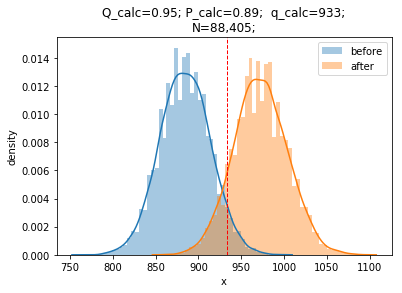

In [63]:
# инициализация экспериментов
np.random.seed(1000)
bin_dist = np.random.binomial(N, p, 10000)
bin_dist_ = np.random.binomial(N, p + DIFF, 10000)

# отрисовка распределений
sns.distplot(bin_dist, label='before')
sns.distplot(bin_dist_, label='after')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()

# для упрощения строим kde
x = np.arange(plt.xlim()[0], plt.xlim()[1], 0.1)

# до
kde = st.kde.gaussian_kde(bin_dist)
y = kde(x)
y /= y.sum()
ind = np.argmax(~(y.cumsum() <= Q))
Q_calc = y[:ind].sum()

# после
kde = st.kde.gaussian_kde(bin_dist_)
y_ = kde(x)
y_ /= y_.sum()
P_calc = y_[ind:].sum()

# вывод расчетных данных
plt.axvline(x[ind], c='r', ls='--', lw=1, label='Q bound')
plt.title('Q_calc={:.2f}; P_calc={:.2f};  q_calc={:d};\nN={:,d};'.format(Q_calc, P_calc, int(x[ind - 1]), int(N)));